## EDA Case Study - Analyse Bank Loan Defaults II

#### Run the first note book so we get all the variables into this notebook

(307511, 122)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
SK_ID_CURR                      307511 non-null int64
TARGET                          307511 non-null int64
NAME_CONTRACT_TYPE              307511 non-null object
CODE_GENDER                     307511 non-null object
FLAG_OWN_CAR                    307511 non-null object
FLAG_OWN_REALTY                 307511 non-null object
CNT_CHILDREN                    307511 non-null int64
AMT_INCOME_TOTAL                307511 non-null float64
AMT_CREDIT                      307511 non-null float64
AMT_ANNUITY                     307499 non-null float64
AMT_GOODS_PRICE                 307233 non-null float64
NAME_TYPE_SUITE                 306219 non-null object
NAME_INCOME_TYPE                307511 non-null object
NAME_EDUCATION_TYPE             307511 non-null object
NAME_FAMILY_STATUS              307511 non-null object
NAME_HOUSING_TYPE               307511 non-null 

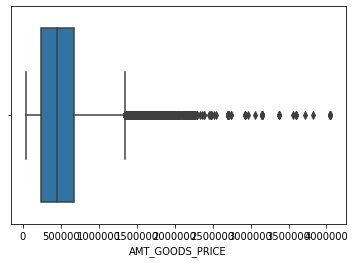

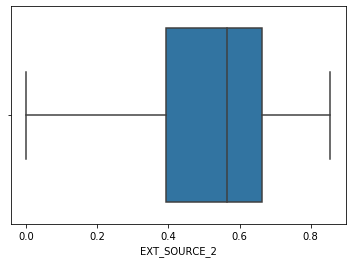

Mode: 0    0.0
dtype: float64
Median: 0.0
Null Values:  41519
Total Number of values:  307511
Null Values:  41519
Total Number of values:  307511
count    265992.000000
mean          1.899974
std           1.869295
min           0.000000
25%           0.000000
50%           1.000000
75%           3.000000
max          25.000000
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64

Median: 1.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 34 columns):
SK_ID_CURR                    307511 non-null int64
TARGET                        307511 non-null int64
NAME_CONTRACT_TYPE            307511 non-null object
CODE_GENDER                   307511 non-null object
FLAG_OWN_CAR                  307511 non-null object
FLAG_OWN_REALTY               307511 non-null object
CNT_CHILDREN                  307511 non-null int64
AMT_INCOME_TOTAL              307511 non-null float64
AMT_CREDIT                    307511 non-null float64
AMT_ANNUITY          

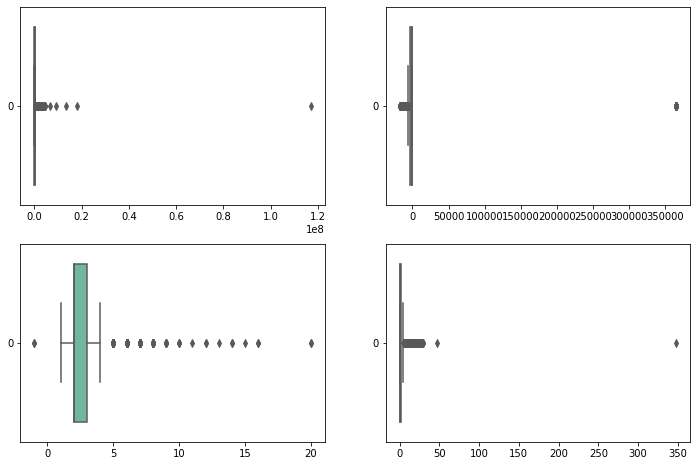

In [1]:
#Import and run first notebook
%run EDACaseStudy-AnalyseBankLoanDefaults1.ipynb


## 3. Analysis

### 3.1 Check Imbalance in data

In [2]:
#Print info to inspect the data frame after importing first notebook
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307510 entries, 0 to 307510
Data columns (total 36 columns):
SK_ID_CURR                    307510 non-null int64
TARGET                        307510 non-null int64
NAME_CONTRACT_TYPE            307510 non-null object
CODE_GENDER                   307510 non-null object
FLAG_OWN_CAR                  307510 non-null object
FLAG_OWN_REALTY               307510 non-null object
CNT_CHILDREN                  307510 non-null int64
AMT_INCOME_TOTAL              307510 non-null float64
AMT_CREDIT                    307510 non-null float64
AMT_ANNUITY                   307498 non-null float64
AMT_GOODS_PRICE               307232 non-null float64
NAME_TYPE_SUITE               306218 non-null object
NAME_INCOME_TYPE              307510 non-null object
NAME_EDUCATION_TYPE           307510 non-null object
NAME_FAMILY_STATUS            307510 non-null object
NAME_HOUSING_TYPE             307510 non-null object
REGION_POPULATION_RELATIVE    307510 non

In [3]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_YEAR,FLAG_DEFAULT,TOTAL_INCOME_TYPE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637.0,-3648,-2120,Laborers,1,0,0,Business Entity Type 3,0.262949,0.139376,2.0,-1134.0,0,1,0,1,YES,High
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188.0,-1186,-291,Core staff,2,0,0,School,0.622246,NaN,1.0,-828.0,0,1,0,0,NO,High
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225.0,-4260,-2531,Laborers,1,0,0,Government,0.555912,0.729567,0.0,-815.0,0,0,0,0,NO,Low
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039.0,-9833,-2437,Laborers,2,0,0,Business Entity Type 3,0.650442,NaN,2.0,-617.0,0,1,-1,-1,NO,Medium
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038.0,-4311,-3458,Core staff,1,0,0,Religion,0.322738,NaN,0.0,-1106.0,0,0,0,0,NO,Medium


In [4]:
#Print the number of applications by some categorical variables
cols = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'NAME_FAMILY_STATUS', 'NAME_TYPE_SUITE']

def pri_value_counts(df, cols):
    for col in cols:
        print()
        print(df[col].value_counts(normalize=True) * 100, '\n')

pri_value_counts(df, cols)


Cash loans         90.479009
Revolving loans     9.520991
Name: NAME_CONTRACT_TYPE, dtype: float64 


F      65.834607
M      34.164092
XNA     0.001301
Name: CODE_GENDER, dtype: float64 


Married                 63.878248
Single / not married    14.777731
Civil marriage           9.682612
Separated                6.429059
Widow                    5.231700
Unknown                  0.000650
Name: NAME_FAMILY_STATUS, dtype: float64 


Unaccompanied      81.159827
Family             13.110921
Spouse, partner     3.713041
Children            1.066887
Other_B             0.578020
Other_A             0.282805
Group of people     0.088499
Name: NAME_TYPE_SUITE, dtype: float64 



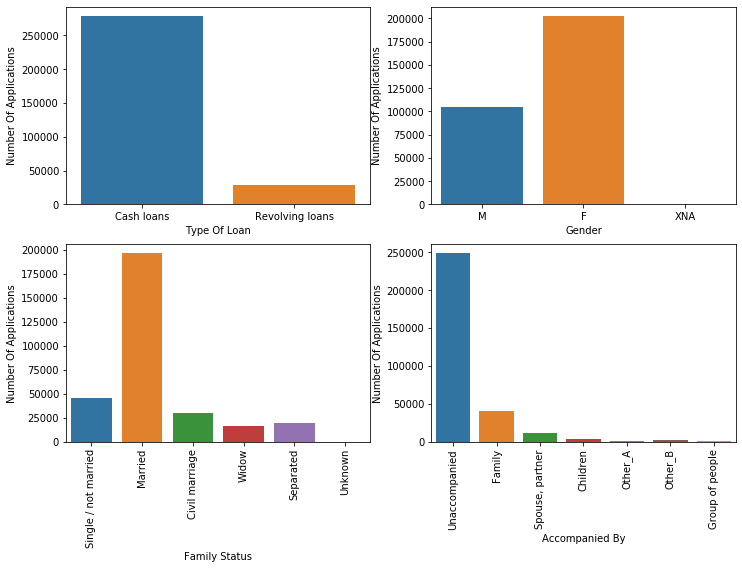

In [5]:
# Function to Draw count plots for the given columns in the dataframe
def draw_count_plots(df, cols, x_labels=None, y_label=None):
    rows = (int(len(cols)/2))+len(cols) % 2
    plt.figure(figsize=(12, rows*4) )
    plt.plot(rows,2,rows*2)
    i=0
    for col in cols:
        i += 1
        plt.subplot(rows,2,i)
        ax = sns.countplot(x=col,data=df)
        if(y_label != None):
            plt.ylabel(y_label)
        if(x_labels != None):
            plt.xlabel(x_labels[i-1])
        if( len(df[col].unique()) > 4):
            plt.xticks(rotation=90)

    plt.show()

#Labels for chart axis
x_labels = ['Type Of Loan', 'Gender', 'Family Status', 'Accompanied By']

#Draw Count plots for the 4 columns
draw_count_plots(df,cols,x_labels,'Number Of Applications')


#### Imbalances in Data:
1. Most of the applicants are looking for cash loan. Only few revolving loan applicants exist
2. There are more female applicants than Male applicants. Female applicants are almost double that of males
3. Many of the applicants are married
4. About 80% of the applicants are unaccompanied while applying for loan

### 3.2 Divide data into two sets using Target

In [6]:
df.TARGET.value_counts()

0    282685
1     24825
Name: TARGET, dtype: int64

In [7]:
df0 = df[df.TARGET == 0]
df1 = df[df.TARGET == 1]

### 3.3  Univariate Analysis - Categorical Variables

In [8]:
#Print Categorical columns
df0.select_dtypes(exclude=np.number).columns

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'ORGANIZATION_TYPE', 'OBS_30_CNT_SOCIAL_CIRCLE', 'FLAG_DEFAULT',
       'TOTAL_INCOME_TYPE'],
      dtype='object')

### Definition of Default Rate: It is the mean value of Target column in the data set to indicate how likely a category of people would default the loan.  High Default rate is not good, where as a low default rate is good for the bank. Default Rate for the all applicants is 8.1

In [9]:
#Default rate of the whole data set.
print('Default Rate of full data set: ', round(df['TARGET'].mean()*100,2))

Default Rate of full data set:  8.07


#### 3.3.1 Statististics (Default Rate)

#### Function to print Loan default rate by a given categorical column by grouping data on that column.

In [10]:
#This functio nreturns default rate as a series for the given categorical column
# When you take the mean of the Target column, it indicates the default rate
def loan_def_rate(df,col):
    s = df.groupby(col).mean()['TARGET']*100
    return s;

# This function takes data frame and a categorical column name as input
# Prints the default rate by the given column
def pri_loan_def_rate(df,col):
    print('Default Rates by ', col,': \n')
    s = loan_def_rate(df,col)
    for i in s.items():
        print(i[0],':', round(i[1],2))
    print()



In [11]:
#Default rate of the whole data set. Default rate is nothig but the mean of Target column
print('Default Rate of full data set: ', round(df['TARGET'].mean()*100,2))

Default Rate of full data set:  8.07


In [12]:
#Print default rates by some categorical columns.
cols = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 
        'OCCUPATION_TYPE', 'NAME_FAMILY_STATUS', 'TOTAL_INCOME_TYPE']

for col in cols:
    pri_loan_def_rate(df,col)

Default Rates by  NAME_CONTRACT_TYPE : 

Cash loans : 8.35
Revolving loans : 5.48

Default Rates by  CODE_GENDER : 

F : 7.0
M : 10.14
XNA : 0.0

Default Rates by  NAME_INCOME_TYPE : 

Businessman : 0.0
Commercial associate : 7.48
Maternity leave : 40.0
Pensioner : 5.39
State servant : 5.76
Student : 0.0
Unemployed : 36.36
Working : 9.59

Default Rates by  NAME_EDUCATION_TYPE : 

Academic degree : 1.83
Higher education : 5.36
Incomplete higher : 8.48
Lower secondary : 10.93
Secondary / secondary special : 8.94

Default Rates by  OCCUPATION_TYPE : 

Accountants : 4.83
Cleaning staff : 9.61
Cooking staff : 10.44
Core staff : 6.3
Drivers : 11.33
HR staff : 6.39
High skill tech staff : 6.16
IT staff : 6.46
Laborers : 10.58
Low-skill Laborers : 17.15
Managers : 6.21
Medicine staff : 6.7
Private service staff : 6.6
Realty agents : 7.86
Sales staff : 9.63
Secretaries : 7.05
Security staff : 10.74
Waiters/barmen staff : 11.28

Default Rates by  NAME_FAMILY_STATUS : 

Civil marriage : 9.94
Marr

In [13]:
#Let us draw above stats for easy visualization

#Function to draw bars for default rate
def draw_def_rate_bars(df,cols, x_labels=None, y_label=None):
    rows = (int(len(cols)/2))+len(cols) % 2
    plt.figure(figsize=(12, rows*5) )
    plt.plot(rows,2,rows*2)

    i=0
    for col in cols:
        i += 1
        plt.subplot(rows,2,i)
        s = loan_def_rate(df,col)
        s.plot.bar()
        if(y_label != None):
            plt.ylabel(y_label)
        if(x_labels != None):
            plt.xlabel(x_labels[i-1])
        plt.xticks(rotation=90)

    plt.show()


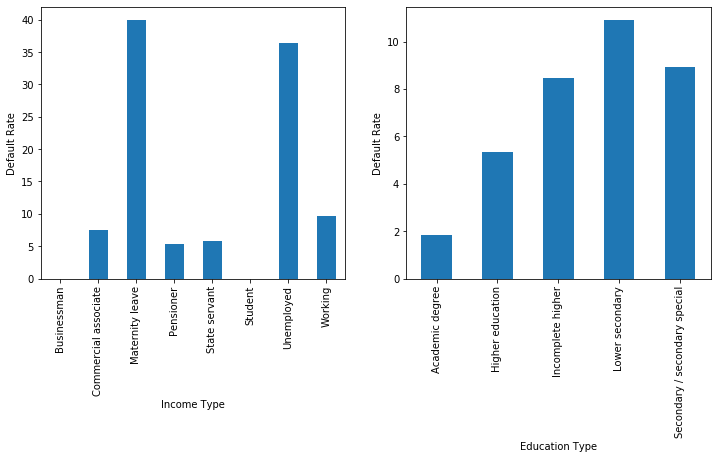

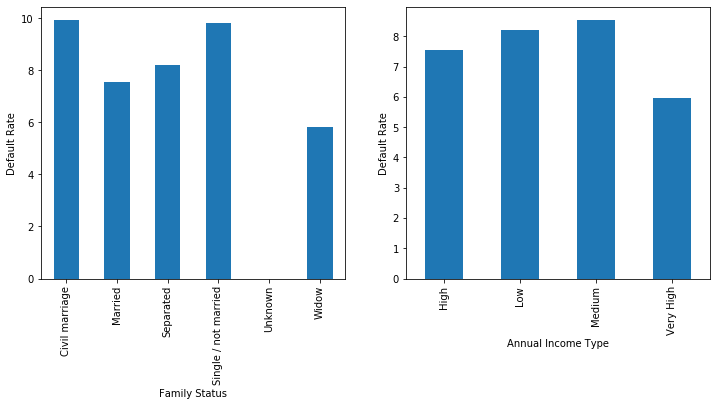

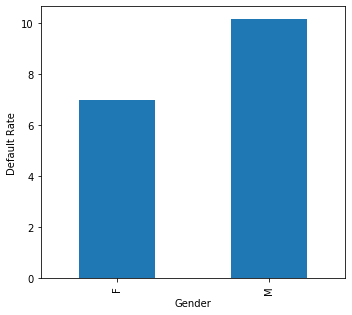

In [14]:
#Label for chart Y-axis
y_label='Default Rate'

#Draw default rates for some of the columns 
draw_def_rate_bars(df,['NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE'], ['Income Type', 'Education Type'] , y_label)

draw_def_rate_bars(df,['NAME_FAMILY_STATUS', 'TOTAL_INCOME_TYPE'], ['Family Status', 'Annual Income Type'], y_label)

draw_def_rate_bars(df[df.CODE_GENDER != 'XNA'],['CODE_GENDER'], ['Gender'], y_label)


#### Patterns observed using the default rates:

1. Business Men and Students have a zero default rate, these people are a good target for bank to give loans. People on Maternity Leave and Unemployed have a very high default rate. Bank should be cautious while approving loans to them.
2. Academic degree holders have a low default rate where as people with Lower Secondary education has a high default rate. Academic degree holders are one target group for the Bank to give loans.
3. Nothing that stands out clearly for Family Status, though widows have a slightly low default rate compared to others.
4. Very High annual income group has a slightly low default rate
5. Females default less compared to males


### 3.4 Univariate Analysis - Numeric Variables

In [15]:
#Print all numerical columns.
cols = df.select_dtypes(include=np.number).columns
cols

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'CNT_FAM_MEMBERS',
       'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_LAST_PHONE_CHANGE',
       'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object')

#### 3.4.1 Using Box Plots

#### Function to draw box plots for a given categorical column against a list of numeric columns with an optional hue column

In [16]:
# This function takes a data frame, one categorical column name, list of numerical columns and an optional hue column
# Draws 2 box plots per row with categorical column on x-axis and numerical column on y-axis with hue if any 
def draw_box_plots(df, cat_col, num_cols, hue_col=None,x_label =None,y_labels=None,legend_loc=None):
    rows = (len(num_cols)/2)+len(num_cols)%2
    plt.figure(figsize=(14,rows*5))
    plt.plot(rows,2,rows*2)
    i=0
    for num_col in num_cols:
        i = i+1
        plt.subplot(rows,2,i)
        sns.boxplot(x=cat_col, y = num_col, data = df, hue=hue_col)
        if(x_label != None):
            plt.xlabel(x_label)
        if(y_labels != None):
            plt.ylabel(y_labels[i-1])
        if(len(df[cat_col].unique()) > 4):
            plt.xticks(rotation = 90)
        if(legend_loc != None):
            plt.legend(loc=legend_loc)
    plt.show()

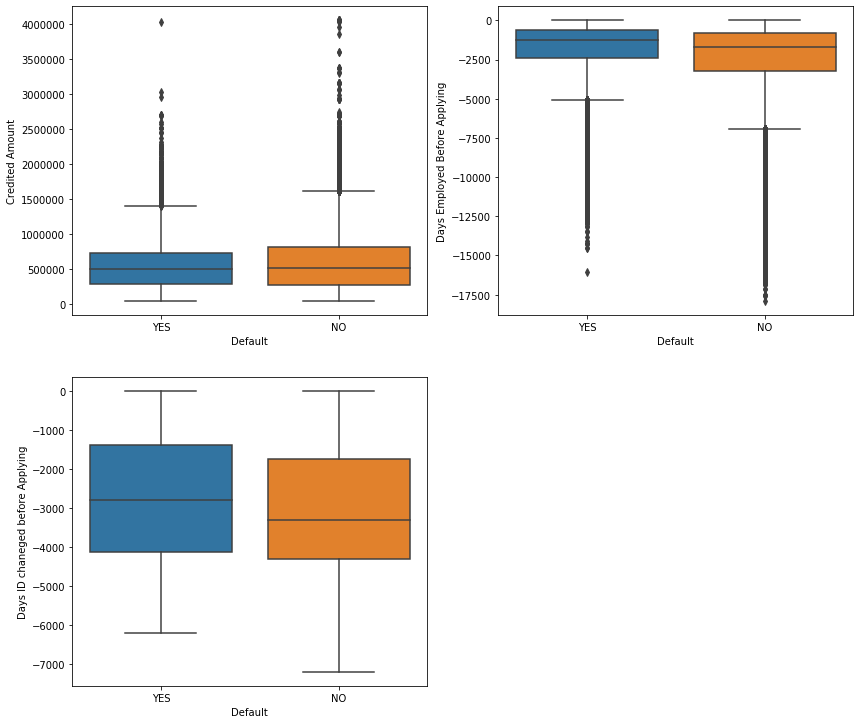

In [17]:
# Plot box plots for Target - 0 and Target - 1 data sets for few columns to check if there any patterns
#Selected columns
cols = ['AMT_CREDIT', 'DAYS_EMPLOYED', 'DAYS_ID_PUBLISH']

#Column Labels fopr Chart
y_labels = ['Credited Amount', 'Days Employed Before Applying', 'Days ID chaneged before Applying']

draw_box_plots(df,'FLAG_DEFAULT', cols, x_label='Default', y_labels=y_labels)

#### Patterns drawn from above box plots and statistics below:

1. Credited Amount : More the amount of credit, they are less likely to default. 75% of applicants in non defaulters have got a credit of about 8 Lakhs where as defaulters have got a credit of about 7 Lakhs.
2. Number of Days employed before applying for loan : If an applicant is employed for more number of days before applying, they are less likely to default. As you can see in stats, 75% of applicants in non defaulters are employed up to 789 days before applying where defaulters are employed for for less than 594 days.
3. Registered ID change before applying: Defaulters have changed their registered IDs little more recent than non defaulters.

Same patterns are observed using the statistics in section 3.4.2

#### 3.4.2 Using statistics

#### Function to describe a numeric column and print the statistics side by side to make it easy to compare

In [18]:
#This function takes a column name as input
#Describes the column in Target 0 and 1 data sets
#Concatenate both stats and print them together for easy comparison
def desc_col(col):
    s0 = df0[col].describe()
    s1 = df1[col].describe()
    print('Describe - ' + col + ' : ')
    print(pd.concat(objs=[s0.rename('Default - NO'),s1.rename('Default - YES')],axis=1))
    print()


In [19]:
for col in cols:
    desc_col(col)

Describe - AMT_CREDIT : 
       Default - NO  Default - YES
count  2.826850e+05   2.482500e+04
mean   6.026498e+05   5.577785e+05
std    4.068459e+05   3.464332e+05
min    4.500000e+04   4.500000e+04
25%    2.700000e+05   2.844000e+05
50%    5.177880e+05   4.975200e+05
75%    8.100000e+05   7.333155e+05
max    4.050000e+06   4.027680e+06

Describe - DAYS_EMPLOYED : 
        Default - NO  Default - YES
count  230301.000000    21835.00000
mean    -2438.142396    -1814.91880
std      2372.414366     1849.74065
min    -17912.000000   -16069.00000
25%     -3254.000000    -2380.50000
50%     -1691.000000    -1230.00000
75%      -789.000000     -594.00000
max         0.000000        0.00000

Describe - DAYS_ID_PUBLISH : 
        Default - NO  Default - YES
count  282685.000000   24825.000000
mean    -3017.222304   -2732.099617
std      1506.616161    1516.975313
min     -7197.000000   -6207.000000
25%     -4313.000000   -4119.000000
50%     -3295.000000   -2797.000000
75%     -1755.000000   -

### 3.5 Bivariate Analysis - Numeric variables

#### 3.5.1 Correlation Between Numeric variables

#### Function to draw correlation matrix for given dataframe and columns

In [20]:
#This function takes a dataframe and list of columns as input
#Draws correlation matrix using seaborn's heatmap
def draw_corr(df,cols,title=None):
    corr_mat = df[cols].corr()
    plt.figure(figsize=(10,6))
    ax = sns.heatmap(corr_mat, annot=True, cmap='YlGnBu')
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    if(title != None):
        plt.title(title)
    plt.show()

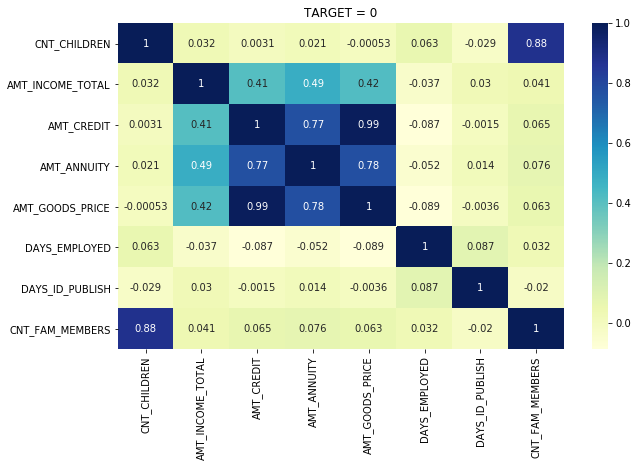

In [21]:
#Selected columns for correlation calculation
cols = ['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 
       'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'DAYS_EMPLOYED', 
       'DAYS_ID_PUBLISH', 'CNT_FAM_MEMBERS']

#Correlation Heat Map for Target - 0
draw_corr(df0,cols,'TARGET = 0')

#### Observations from Correlation Map of Target - 0 data set:
1. Credited amount and goods price has a very strong correlation.
2. Credited amount and Annuity amount has a strong correlation. 
3. Annuity Amount and Goods price has a strong correlation 
4. Number of family members and children has a string correlation
5. All other combinations of columns have a weak correlation 

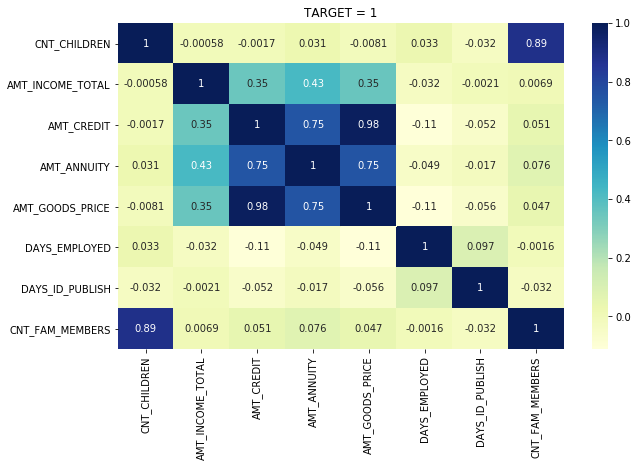

In [22]:
#Correlation Heat Map for Target - 1
draw_corr(df1,cols, title='TARGET = 1')

#### Observations from Correlation Map of Target - 1 data set:
These observations are same as Target - 0
1. Credited amount and goods price has a very strong correlation.
2. Credited amount and Annuity amount has a strong correlation. 
3. Annuity Amount and Goods price has a strong correlation 
4. Number of family members and children has a strong correlation
5. All other combinations of columns have a weak correlation 

#### Comparison of  Correlations in Target - 0 and Target - 1 data sets

In [23]:
# This code prints correlation of Target 0, Target 1 and their difference for pairs of numeric columns 
def corr_diff(df0, df1, cols):
    corr_matrix = df0[cols].corr()
    corr = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
    corr_df = corr.unstack().reset_index()
    corr_df.columns  = ['VAR1', 'VAR2', 'Correlation-0']
    corr_df = corr_df.dropna(subset = ['Correlation-0'])
    corr_df['Correlation-0'] = abs(corr_df['Correlation-0'])
    corr_df.unstack().reset_index()
    corr_df.sort_values("Correlation-0", ascending=False)

    corr_matrix1 = df1[cols].corr()
    corr1 = corr_matrix1.where(np.triu(np.ones(corr_matrix1.shape), k=1).astype(np.bool))
    corr_df1 = corr1.unstack().reset_index()
    corr_df1.columns  = ['VAR1', 'VAR2', 'Correlation-1']
    corr_df1 = corr_df1.dropna(subset = ['Correlation-1'])
    corr_df1['Correlation-1'] = abs(corr_df1['Correlation-1'])
    corr_df1.unstack().reset_index()
    corr_df1.sort_values("Correlation-1", ascending=False)

    corr_df = corr_df.merge(corr_df1,on=['VAR1','VAR2'])
    corr_df['Correlation Diff'] = corr_df['Correlation-0'] - corr_df['Correlation-1']
    
    return corr_df

In [24]:
#Selected columns for correlation calculation
cols = ['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 
       'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'DAYS_EMPLOYED', 
       'DAYS_ID_PUBLISH', 'CNT_FAM_MEMBERS', 'AMT_REQ_CREDIT_BUREAU_YEAR']
corr_df = corr_diff(df0, df1, cols)

#Print the correlations in Target=0 (Correlation-0), Target=1(Correlation-1) and their difference 
# with sorting by higly correlated values on top
corr_df.sort_values(['Correlation-0','Correlation-1'], ascending = False)

,VAR1,VAR2,Correlation-0,Correlation-1,Correlation Diff
8,AMT_GOODS_PRICE,AMT_CREDIT,0.987250,0.983103,0.004148
21,CNT_FAM_MEMBERS,CNT_CHILDREN,0.878547,0.885484,-0.006936
9,AMT_GOODS_PRICE,AMT_ANNUITY,0.776685,0.752699,0.023986
5,AMT_ANNUITY,AMT_CREDIT,0.771308,0.752195,0.019113
4,AMT_ANNUITY,AMT_INCOME_TOTAL,0.487821,0.428008,0.059813
7,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,0.418662,0.353008,0.065654
2,AMT_CREDIT,AMT_INCOME_TOTAL,0.412872,0.351708,0.061164
14,DAYS_EMPLOYED,AMT_GOODS_PRICE,0.088637,0.111933,-0.023296
12,DAYS_EMPLOYED,AMT_CREDIT,0.087500,0.106003,-0.018503
20,DAYS_ID_PUBLISH,DAYS_EMPLOYED,0.086679,0.096559,-0.009880


In [25]:
#Sort by Correlation difference and print
corr_df.sort_values(['Correlation Diff'], ascending = False)

,VAR1,VAR2,Correlation-0,Correlation-1,Correlation Diff
7,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,0.418662,0.353008,0.065654
2,AMT_CREDIT,AMT_INCOME_TOTAL,0.412872,0.351708,0.061164
4,AMT_ANNUITY,AMT_INCOME_TOTAL,0.487821,0.428008,0.059813
22,CNT_FAM_MEMBERS,AMT_INCOME_TOTAL,0.040707,0.006927,0.033780
0,AMT_INCOME_TOTAL,CNT_CHILDREN,0.032349,0.000575,0.031774
10,DAYS_EMPLOYED,CNT_CHILDREN,0.063037,0.032627,0.030410
26,CNT_FAM_MEMBERS,DAYS_EMPLOYED,0.031501,0.001630,0.029871
16,DAYS_ID_PUBLISH,AMT_INCOME_TOTAL,0.029839,0.002051,0.027788
9,AMT_GOODS_PRICE,AMT_ANNUITY,0.776685,0.752699,0.023986
5,AMT_ANNUITY,AMT_CREDIT,0.771308,0.752195,0.019113


#### Observations on Correlation comparison between Target 0 and Target 1
1. All the numeric variables have same correlation between them in both Target 0 and Target 1 data sets


#### 3.5.2 Bivariate analysis - Numeric vs Numeric using Scatter plots

#### Scatter plots for full data set (Target 0 and Target 1)
As we have already observed that the corelation is same for both data sets, let us check scatter plots for full data set

D:\Installed\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
D:\Installed\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


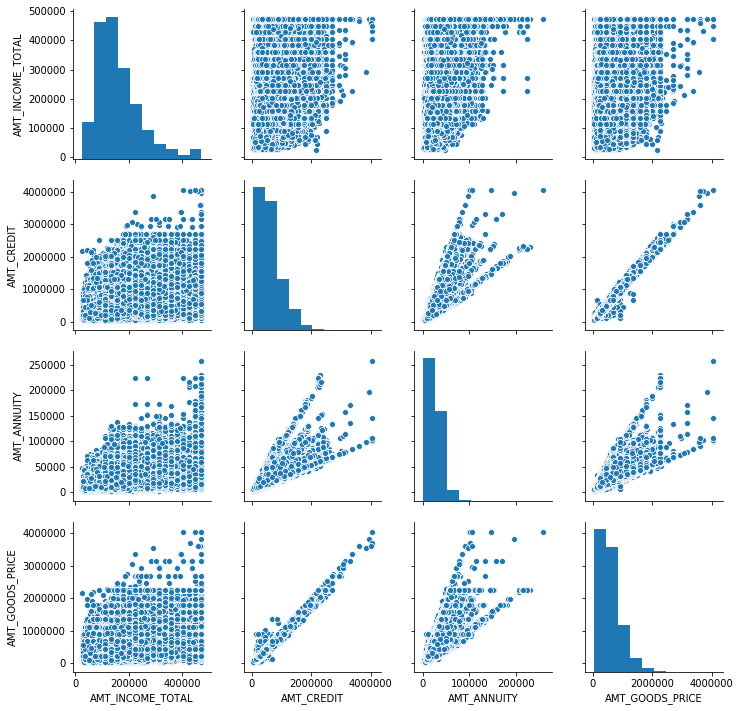

In [26]:
#Selected columns for scatter plots 
cols = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE']

sns.pairplot(df[cols])

#### Observations from Scatter Plots:
1. Credited amount and goods price has a good relationship.  Almost a straight line, which means credited amount is directly proportional to goods price.
2. Credited amount and Annuity amount has good correlation too.  
3. Annuity Amount and Goods price also has good correlation.
4. Total Annual income doesn't seem to have any correlation with other columns. 

#### 3.5.3 Bivariate Analysis - Numeric vs Categorical

#### Use Box plots for Numeric vs Categorical

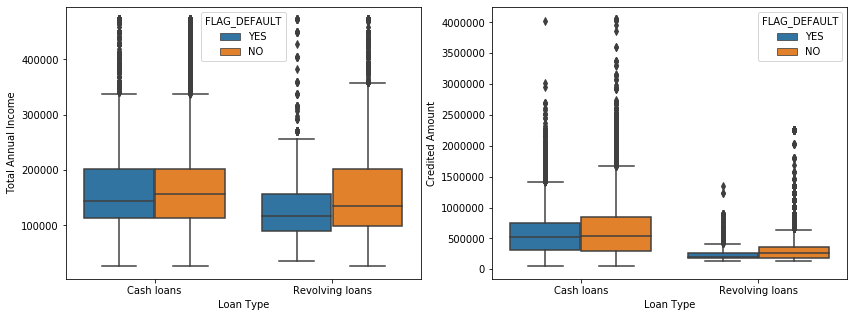

In [27]:
#Selected columns
num_cols= ['AMT_INCOME_TOTAL', 'AMT_CREDIT']

#Their Labels on Chart
y_labels= ['Total Annual Income', 'Credited Amount']

draw_box_plots(df,'NAME_CONTRACT_TYPE',num_cols,hue_col='FLAG_DEFAULT',y_labels=y_labels, x_label='Loan Type')

#### Observations:

1. Cash Loans have higher Annual Income and Credit than revolving loans
2. For Cash loans, Annual Total Income has no impact on the defaulters. For Revolving loans, people with less income default more.
3. For both Cash and revolving loans, people with higher credit amount are less likely to default than those with lower credit.

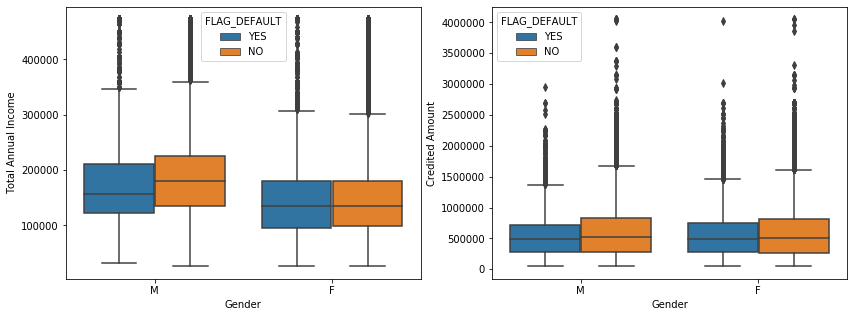

In [28]:
#Box plot for Gender with a hue on DEFAULT flag
draw_box_plots(df[df.CODE_GENDER!='XNA'],'CODE_GENDER',num_cols,hue_col='FLAG_DEFAULT',y_labels=y_labels, x_label='Gender')

#### Observations:
1. Males have higher income than females
2. Female's total annual income doesn't seem to have any impact on defaulting .
3. Males who default have lesser income than those who do not default.

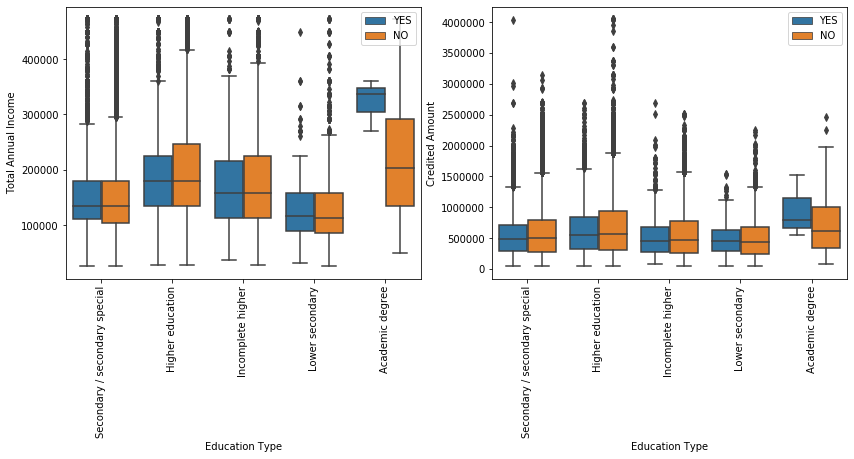

In [29]:
#Selected Columns
num_cols= ['AMT_INCOME_TOTAL', 'AMT_CREDIT']

#Their Labels
y_labels= ['Total Annual Income', 'Credited Amount']

draw_box_plots(df,'NAME_EDUCATION_TYPE',num_cols,hue_col='FLAG_DEFAULT',y_labels=y_labels, x_label='Education Type',legend_loc=1)

#### Observations from the above plots
1. Academic Degree applicants have high Income, Credit and Annuity.
2. Interesting to observe that, Academic degree applicants that default have higher income than those that do not default. This observation is true for even Credited amount and Annuity too

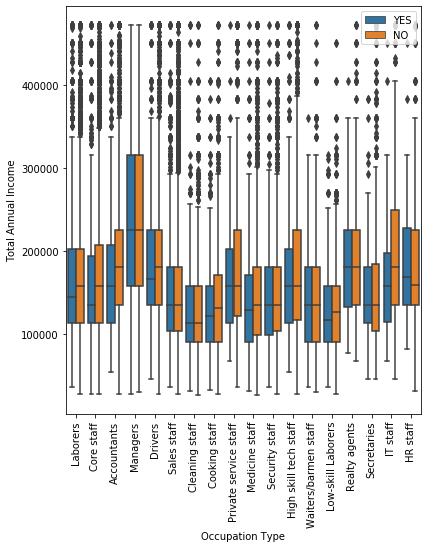

In [30]:
#Selected Columns
num_cols= ['AMT_INCOME_TOTAL']

#Their Labels
y_labels= ['Total Annual Income']

draw_box_plots(df,'OCCUPATION_TYPE',num_cols,hue_col='FLAG_DEFAULT',y_labels=y_labels, x_label='Occupation Type',legend_loc=1)

#### Observations:
1. Managers make more money than other occupations

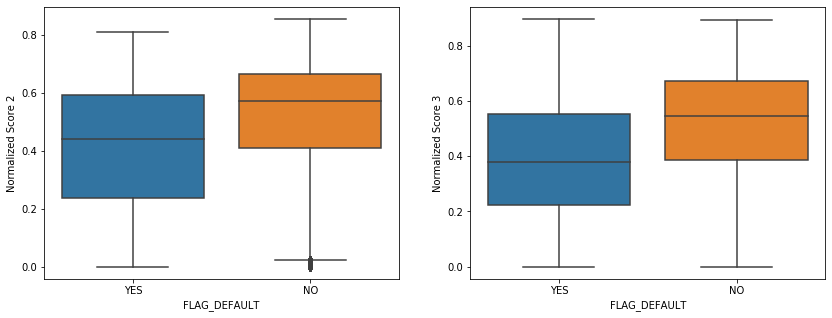

In [31]:
# sns.boxplot('TARGET','EXT_SOURCE_2',data=df)
draw_box_plots(df,'FLAG_DEFAULT',['EXT_SOURCE_2','EXT_SOURCE_3'],y_labels=['Normalized Score 2', 'Normalized Score 3'])

#### Observations:
1. Defaulted customers have a low normalized score from external source 2 and 3 

#### 3.5.4 Bivariate Analysis - Categorical vs Categorical

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

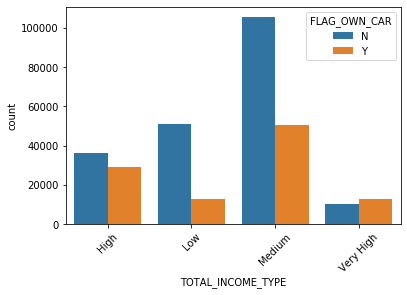

In [32]:
sns.countplot(x='TOTAL_INCOME_TYPE', hue='FLAG_OWN_CAR',data=df)
plt.xticks(rotation=45)

#### Observations
Applicants with very high income are most likely to own a car

## 4. Previous Application Data

### 4.1 Read and Inspect previous applucation data

In [33]:
#Read privious application data file
df_pad = pd.read_csv('previous_application.csv')

In [34]:
#Print info
df_pad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
SK_ID_PREV                     1670214 non-null int64
SK_ID_CURR                     1670214 non-null int64
NAME_CONTRACT_TYPE             1670214 non-null object
AMT_ANNUITY                    1297979 non-null float64
AMT_APPLICATION                1670214 non-null float64
AMT_CREDIT                     1670213 non-null float64
AMT_DOWN_PAYMENT               774370 non-null float64
AMT_GOODS_PRICE                1284699 non-null float64
WEEKDAY_APPR_PROCESS_START     1670214 non-null object
HOUR_APPR_PROCESS_START        1670214 non-null int64
FLAG_LAST_APPL_PER_CONTRACT    1670214 non-null object
NFLAG_LAST_APPL_IN_DAY         1670214 non-null int64
RATE_DOWN_PAYMENT              774370 non-null float64
RATE_INTEREST_PRIMARY          5951 non-null float64
RATE_INTEREST_PRIVILEGED       5951 non-null float64
NAME_CASH_LOAN_PURPOSE         1670214 non-null object
NAME_CONTRA

In [35]:
df_pad.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
#Describe all columns in previous application data
df_pad.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,5951.000000,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,0.188357,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,0.087671,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,0.034781,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,0.160716,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,0.189122,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,0.193330,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,1.000000,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


#### Merge application Data and Previous application data

In [37]:
#Merge using SK_ID_CURR value as ajoin condition with suffixes for overlapping columns 
df_m = pd.merge(left=df, right=df_pad, on='SK_ID_CURR',how='inner',suffixes=('_AD','_PAD'),left_index=True)

In [38]:
#Inspect after merging 
df_m.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1413698 entries, 892077 to 1411592
Data columns (total 72 columns):
SK_ID_CURR                     1413698 non-null int64
TARGET                         1413698 non-null int64
NAME_CONTRACT_TYPE_AD          1413698 non-null object
CODE_GENDER                    1413698 non-null object
FLAG_OWN_CAR                   1413698 non-null object
FLAG_OWN_REALTY                1413698 non-null object
CNT_CHILDREN                   1413698 non-null int64
AMT_INCOME_TOTAL               1413698 non-null float64
AMT_CREDIT_AD                  1413698 non-null float64
AMT_ANNUITY_AD                 1413605 non-null float64
AMT_GOODS_PRICE_AD             1412490 non-null float64
NAME_TYPE_SUITE_AD             1410172 non-null object
NAME_INCOME_TYPE               1413698 non-null object
NAME_EDUCATION_TYPE            1413698 non-null object
NAME_FAMILY_STATUS             1413698 non-null object
NAME_HOUSING_TYPE              1413698 non-null object
R

In [39]:
df_m.head(15)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_AD,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_AD,AMT_ANNUITY_AD,AMT_GOODS_PRICE_AD,NAME_TYPE_SUITE_AD,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_YEAR,FLAG_DEFAULT,TOTAL_INCOME_TYPE,SK_ID_PREV,NAME_CONTRACT_TYPE_PAD,AMT_ANNUITY_PAD,AMT_APPLICATION,AMT_CREDIT_PAD,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE_PAD,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE_PAD,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
892077,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637.0,-3648,-2120,Laborers,1,0,0,Business Entity Type 3,0.262949,0.139376,2.0,-1134.0,0,1,0,1,YES,High,1038818,Consumer loans,9251.775,179055.00,179055.0,0.00,179055.00,SATURDAY,9,Y,1,0.000000,NaN,NaN,XAP,Approved,-606,XNA,XAP,NaN,New,Vehicles,POS,XNA,Stone,500,Auto technology,24.0,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0
575941,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188.0,-1186,-291,Core staff,2,0,0,School,0.622246,NaN,1.0,-828.0,0,1,0,0,NO,High,1810518,Cash loans,98356.995,900000.00,1035882.0,NaN,900000.00,FRIDAY,12,Y,1,NaN,NaN,NaN,XNA,Approved,-746,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-716.0,-386.0,-536.0,-527.0,1.0
1021650,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188.0,-1186,-291,Core staff,2,0,0,School,0.622246,NaN,1.0,-828.0,0,1,0,0,NO,High,2636178,Consumer loans,64567.665,337500.00,348637.5,0.00,337500.00,SUNDAY,17,Y,1,0.000000,NaN,NaN,XAP,Approved,-828,Cash through the bank,XAP,Family,Refreshed,Furniture,POS,XNA,Stone,1400,Furniture,6.0,middle,POS industry with interest,365243.0,-797.0,-647.0,-647.0,-639.0,0.0
1223745,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188.0,-1186,-291,Core staff,2,0,0,School,0.622246,NaN,1.0,-828.0,0,1,0,0,NO,High,2396755,Consumer loans,6737.310,68809.50,68053.5,6885.00,68809.50,SATURDAY,15,Y,1,0.100061,NaN,NaN,XAP,Approved,-2341,Cash through the bank,XAP,Family,Refreshed,Consumer Electronics,POS,XNA,Country-wide,200,Consumer electronics,12.0,middle,POS household with interest,365243.0,-2310.0,-1980.0,-1980.0,-1976.0,1.0
935548,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225.0,-4260,-2531,Laborers,1,0,0,Government,0.555912,0.729567,0.0,-815.0,0,0,0,0,NO,Low,1564014,Consumer loans,5357.250,24282.00,20106.0,4860.00,24282.00,FRIDAY,5,Y,1,0.212008,NaN,NaN,XAP,Approved,-815,Cash through the bank,XAP,Unaccompanied,New,Mobile,POS,XNA,Regional / Local,30,Connectivity,4.0,middle,POS mobile without interest,365243.0,-784.0,-694.0,-724.0,-714.0,0.0
98162,100006,0,Cash loans,F,N,Y,0,13

In [40]:
#Divide data set into two based on TARGET
df_m0 = df_m[df_m.TARGET == 0]
df_m1 = df_m[df_m.TARGET == 1]

###  5. Univariate Analysis for merged Data- Categorical Variables

#### 5.1 statististics (Default Rate)

In [41]:
# Default rate for fully merged data set
df_m['TARGET'].mean()*100

8.655313935508149

In [42]:
# Print Loan default rates after merging with previous data for columns in previous application data
cols = ['NAME_CONTRACT_TYPE_PAD', 'NAME_CONTRACT_STATUS','CHANNEL_TYPE']

for col in cols:
    pri_loan_def_rate(df_m,col)

Default Rates by  NAME_CONTRACT_TYPE_PAD : 

Cash loans : 9.13
Consumer loans : 7.71
Revolving loans : 10.47
XNA : 20.13

Default Rates by  NAME_CONTRACT_STATUS : 

Approved : 7.59
Canceled : 9.17
Refused : 12.0
Unused offer : 8.25

Default Rates by  CHANNEL_TYPE : 

AP+ (Cash loan) : 12.83
Car dealer : 5.17
Channel of corporate sales : 6.38
Contact center : 10.27
Country-wide : 8.26
Credit and cash offices : 9.01
Regional / Local : 7.61
Stone : 7.37



#### Let us draw these default rates as bars for better visualization

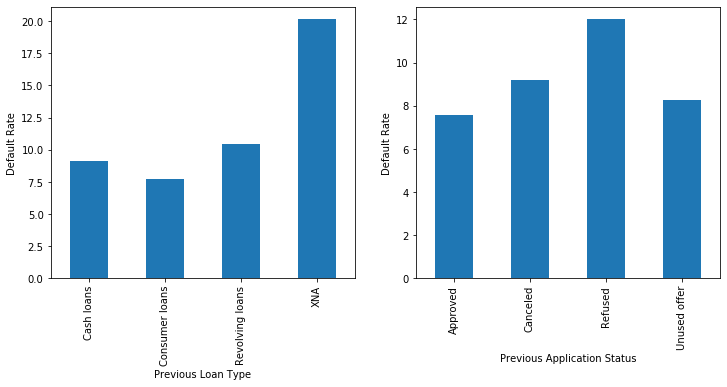

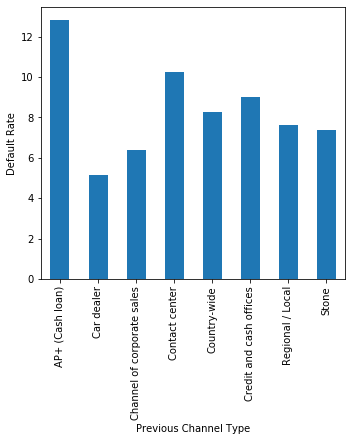

In [43]:
y_label='Default Rate'

draw_def_rate_bars(df_m,['NAME_CONTRACT_TYPE_PAD', 'NAME_CONTRACT_STATUS'], 
                   ['Previous Loan Type', 'Previous Application Status'] , y_label)

draw_def_rate_bars(df_m,['CHANNEL_TYPE'], ['Previous Channel Type'], y_label)


#### Observations:
1. Previous applicants with contract type as Consumer Loans have a low default rate.
2. Previously refused loans have a high default rate. Take extra measure while approving these loans. Take extra measures while approving previously refused applications.
3. Previous applicants with channel type as Car Dealer have a low default rate. Bank can focus on them to give more loans.
4. Previous applicants with channel type as 'AP+ (Cash loan)' have a high default rate. Take extra measures for these applicants.

#### 5.2 Bivariate analysis - Numeric vs Numeric with correlation

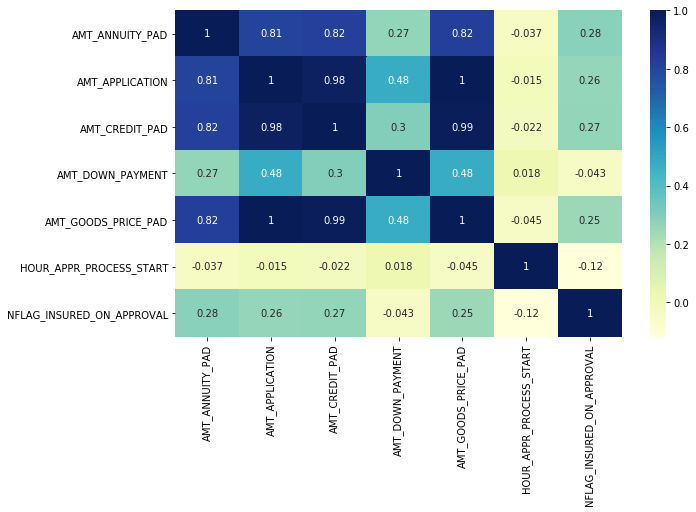

In [44]:
#Selected Numeric columns for correlation calculation
cols = ['AMT_ANNUITY_PAD', 'AMT_APPLICATION', 'AMT_CREDIT_PAD', 'AMT_DOWN_PAYMENT',
       'AMT_GOODS_PRICE_PAD', 'HOUR_APPR_PROCESS_START', 'NFLAG_INSURED_ON_APPROVAL']

#Draw correlation heat map for few columns in previous application data in the 
draw_corr(df_m,cols)

#### Observations from correlations (For Previous application data)
1. Loan Annuity has strong correlatiuon with applied amount, credited amount and Goods Price
2. Applied amount has strong correlation with Credited Amount
3. Credited amount has a strong correlation with Goods Price

In [45]:
#Correlation for Target=0 and Target =1 and the diffrence in correlation
corr_df = corr_diff(df_m0, df_m1,cols)

In [46]:
#Print the values sorted by highly correlated columns
corr_df.sort_values(by=['Correlation-0','Correlation-1'],ascending=False)

,VAR1,VAR2,Correlation-0,Correlation-1,Correlation Diff
7,AMT_GOODS_PRICE_PAD,AMT_APPLICATION,0.999888,0.999676,0.000212
8,AMT_GOODS_PRICE_PAD,AMT_CREDIT_PAD,0.993299,0.992302,0.000996
2,AMT_CREDIT_PAD,AMT_APPLICATION,0.975725,0.975377,0.000348
6,AMT_GOODS_PRICE_PAD,AMT_ANNUITY_PAD,0.821027,0.840196,-0.019169
1,AMT_CREDIT_PAD,AMT_ANNUITY_PAD,0.816541,0.840461,-0.023920
0,AMT_APPLICATION,AMT_ANNUITY_PAD,0.809023,0.824962,-0.015939
4,AMT_DOWN_PAYMENT,AMT_APPLICATION,0.479789,0.473937,0.005851
9,AMT_GOODS_PRICE_PAD,AMT_DOWN_PAYMENT,0.479789,0.473937,0.005851
5,AMT_DOWN_PAYMENT,AMT_CREDIT_PAD,0.298589,0.275166,0.023424
15,NFLAG_INSURED_ON_APPROVAL,AMT_ANNUITY_PAD,0.282135,0.318368,-0.036233


#### Observations:
1. Amount Applied, Goods Price, Annuity and Ammount Credited have strong correlations among them selves in all combinations.
2. All othe combinations have a weak correlation

#### 5.3 Bivariate Analysis - Numeric vs Categorical using Box Plots 

In [47]:
df_m.AMT_GOODS_PRICE_PAD.quantile([.5,.75,.9,.99,.999])

0.500     110245.5
0.750     229500.0
0.900     585000.0
0.990    1395000.0
0.999    2250000.0
Name: AMT_GOODS_PRICE_PAD, dtype: float64

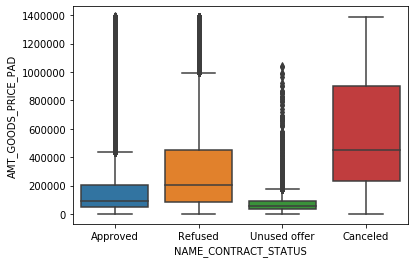

In [48]:
#Box plot for Goods Price in previous application data filtered upto .99 quartile values as there are extreme values in it
sns.boxplot(x='NAME_CONTRACT_STATUS',y='AMT_GOODS_PRICE_PAD',data=df_m[df_m.AMT_GOODS_PRICE_PAD < 1395000])

#### Observations:
1. Goods Price of previously Cancelled loans is high compared to Approved, Refused or Unused loans.

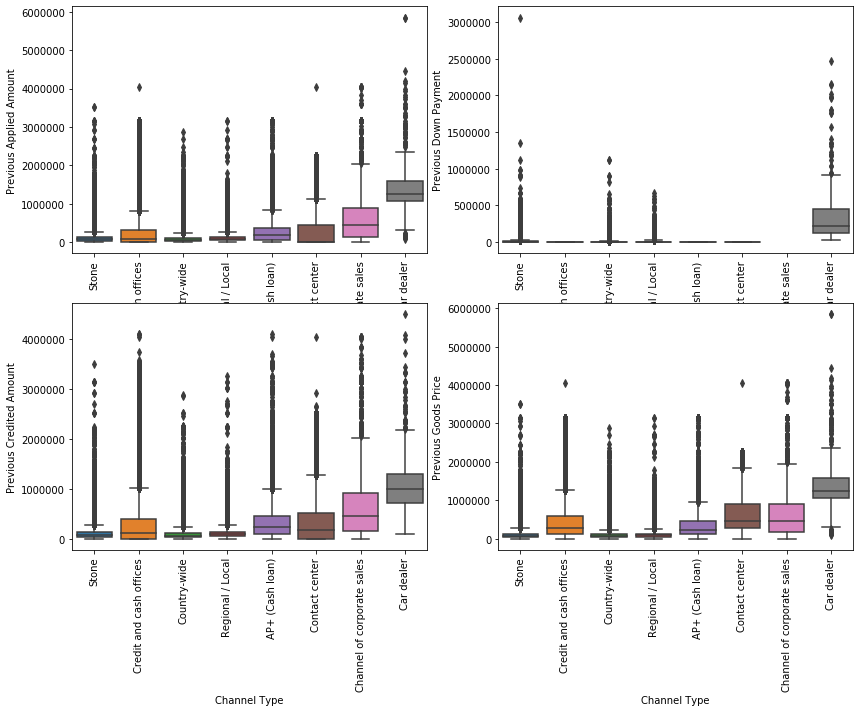

In [49]:
#Selected columns to draw box plots
cols= ['AMT_APPLICATION', 'AMT_DOWN_PAYMENT','AMT_CREDIT_PAD', 'AMT_GOODS_PRICE_PAD']

#Labels for chart
y_labels=['Previous Applied Amount', 'Previous Down Payment', 'Previous Credited Amount', 'Previous Goods Price']

draw_box_plots(df_m,'CHANNEL_TYPE',cols, x_label='Channel Type', y_labels=y_labels)

#### Observations:
1. Car dealers apply for high amount of loan and get high amount of credit as well. 
2. Car Dealers  also have high down payment and Goods Price.